# Project: Classification - Loan Eligibility Prediction

Welcome to the project on classification. We will use the credit risk dataset for this problem.

----------------
## Context:
----------------

Credit risk is the risk of loss resulting from the failure by a borrower to repay the principal and interest owed to the lender. The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses.

------------------
## Objective:
------------------

Easy House is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently, the customer first applies for a home loan post which the company validates the customer's eligibility for that loan.

Now, the company wants to automate the loan eligibility process. They want to harness their past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## Data Dictionary:
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands)
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

## Importing necessary libraries and overview of the dataset - Add libraries as needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [ ]:
# data = pd.read_csv("CreditRisk.csv")
# data.head()

import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1iZ9g3E-i6nAkM4Pzcqz27Ntz8z77DPgF/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


**Data information (data types, number of missing values, unique values for each variable)**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


**Check for missing values**

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**OBSERVATION:** As we can see there are missing values in the data.

If more than 20% of the data is missing then we can remove the column,but the misssing data is very less so removing the rows will suffice.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


**Finding the number of Unique Values to Categorize the data**

In [ ]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

OBSERVATIONS:



*   Columns with significantly higher number of unique values can be identified as Numerical data.



*   Columns where all entries are the value 2 (or similarly less) represent categorical data and can be appropriately categorized.



*   The Loan_ID column contains entirely unique values( As unique values = Entries), which doesn't contribute meaningfully to our prediction efforts. So, we can drop it.


**Data Categorising and summaries (statistical summary of each variable)**

In [ ]:
#Dividing the columns into categorical and numerical category arrays
Numerical_Variables=['ApplicantIncome','CoapplicantIncome','LoanAmount',]
Categorical_Variables=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status','Loan_Amount_Term']
#LoanID is just an identifier and can be dropped
data=data.drop('Loan_ID',axis=1 )

In [ ]:
data[Numerical_Variables].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.166124
std,6109.041673,2926.248369,88.340630
min,150.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000
50%,3812.500000,1188.500000,125.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


**Histograms of all quantitative variables**

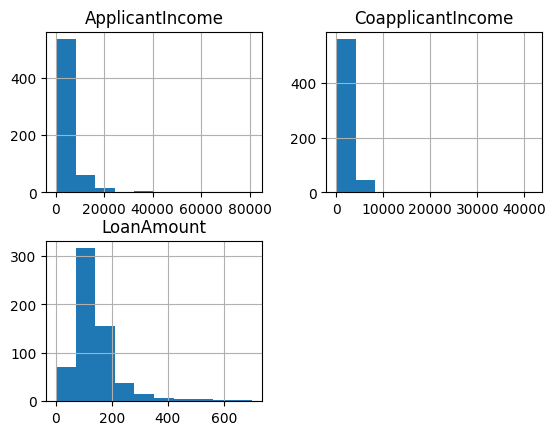

In [ ]:
data[Numerical_Variables].hist()
plt.show()

**visual for each categorical variable**

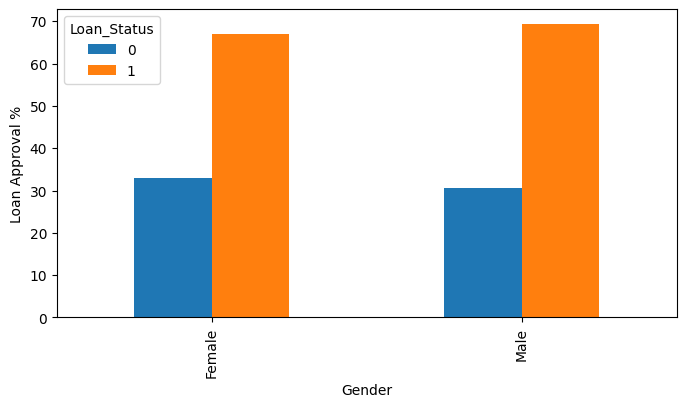

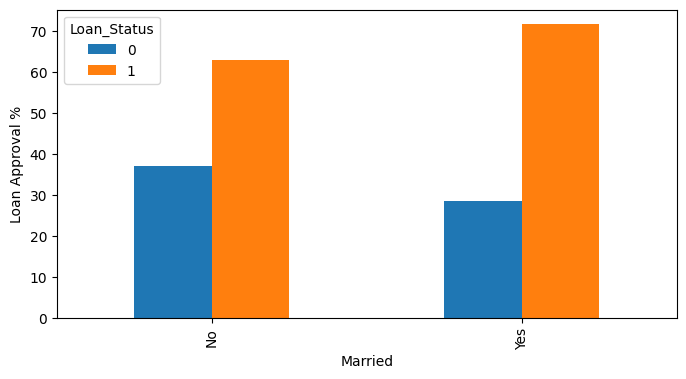

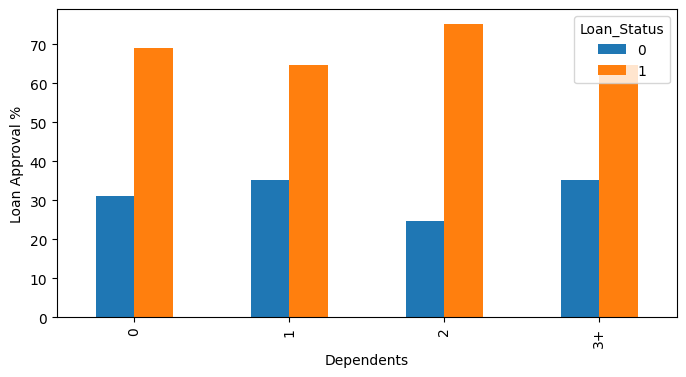

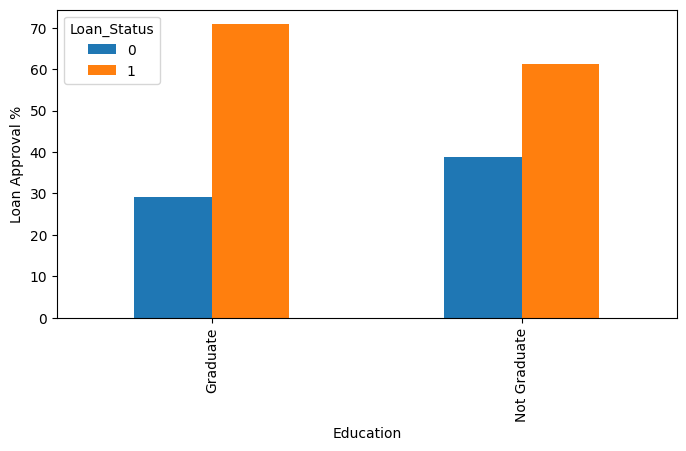

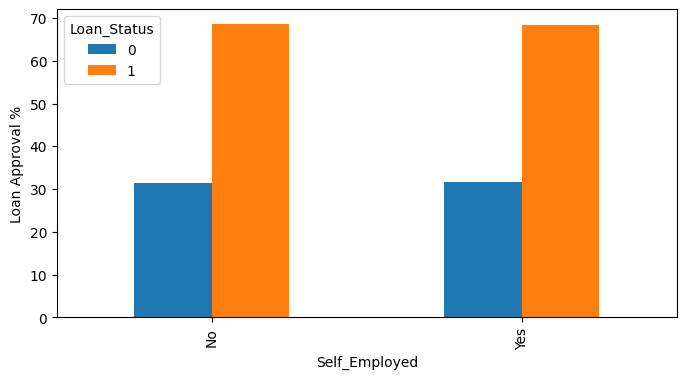

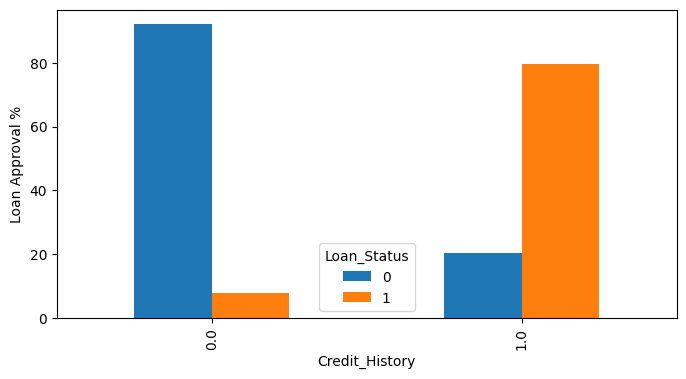

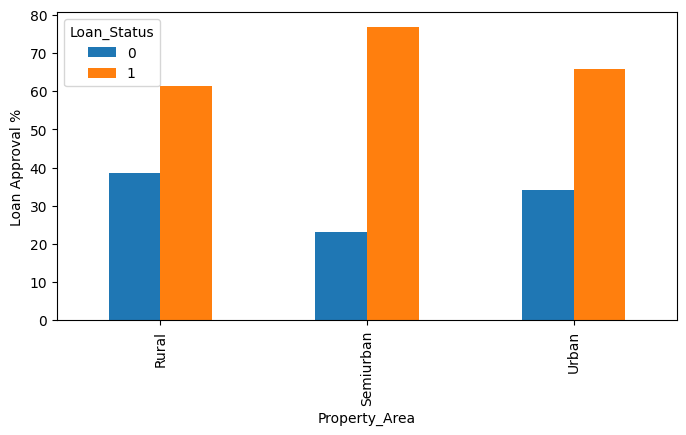

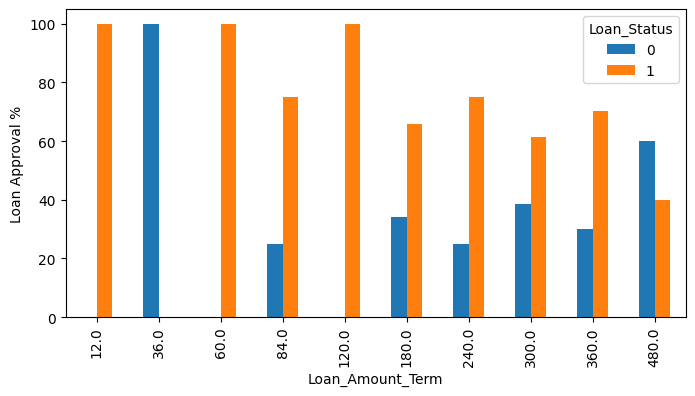

In [ ]:
for i in Categorical_Variables:
    if i!='Loan_Status':
        (pd.crosstab(data[i],data['Loan_Status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=False)
        plt.ylabel('Loan Approval %')

OBSERVATIONS:
*   Gender: Gender does not show a discernible effect on loan approval rates.
*   Marital Status: Married couple has more loan approval rate than unmarried.
*   Dependents: The number of dependents does not seem to have a substantial effect on the probability of loan approval
*   Education: Graduates have higher loan approval rate than non-Graduates
*   Self Employed: Type of Employment couldn't be a deciding factor for loan approval.
*  Credit History: Good credit History has more chance of loan approval than without credit History.
*   Property Area: Semiurban areas show significantly higher rates of loan approval, whereas rural and urban areas have nearly identical approval percentages.
*   Loan Amount Term: Applicants with loan terms of 60 months and 120 months have a notably high probability of loan approval.












**Handle missing values**

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             499 non-null    object 
 1   Married            499 non-null    object 
 2   Dependents         499 non-null    object 
 3   Education          499 non-null    object 
 4   Self_Employed      499 non-null    object 
 5   ApplicantIncome    499 non-null    int64  
 6   CoapplicantIncome  499 non-null    float64
 7   LoanAmount         499 non-null    int64  
 8   Loan_Amount_Term   499 non-null    float64
 9   Credit_History     499 non-null    float64
 10  Property_Area      499 non-null    object 
 11  Loan_Status        499 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 50.7+ KB


**correlation matrix for the predictor variables**

<Axes: >

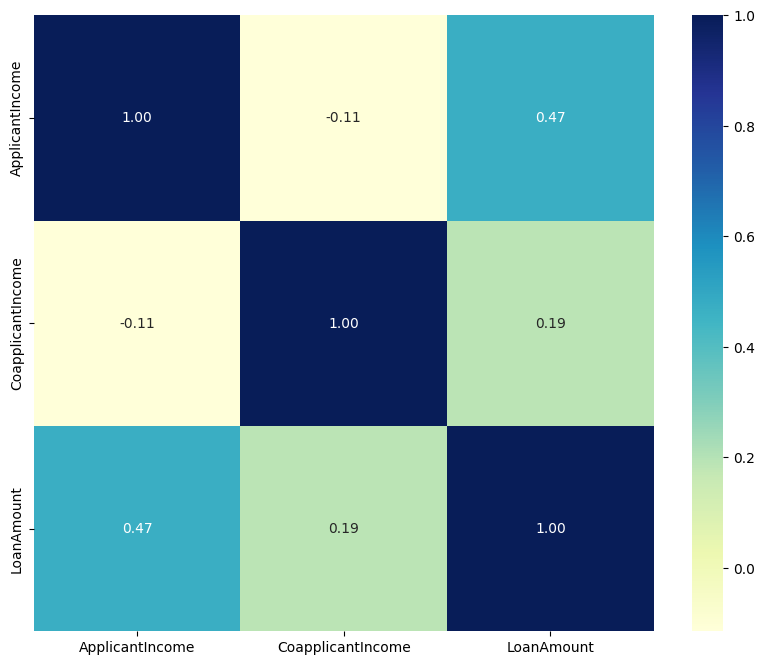

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data[Numerical_Variables].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Convert Categorical Data into Dummies**

In [ ]:
#Generating dummy variables for columns with categorical data.
to_get_dummies_for = ['Gender', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
data = pd.get_dummies(data, columns=to_get_dummies_for, drop_first=False)
dict_married = {'Yes': 1, 'No': 0} # categorical data to 1 or 0
data['Married'] = data['Married'].map(dict_married)

**Splitting Independent and Dependent Variables**

In [ ]:
#Formulating dependent and independent variables.
Y= data.Loan_Status
X= data.drop(columns = ['Loan_Status'])

**Scale the predictor variables**

In [ ]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

****

**Split the data into training and testing sets**

In [ ]:
# train and test data split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1,stratify=Y)

**Metrics Function**

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attriate', 'Attriate'], yticklabels=['Not Attriate', 'Attriate'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Building DecisionTree**

In [ ]:
#Generate a Decision Tree classifier object.
dt = DecisionTreeClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
#Training the model
dt.fit(X_train, y_train)
# predicting the test data
y_pred = dt.predict(X_test)
y_pred[:6]

array([0, 0, 0, 0, 0, 1])

**Checking the performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       238

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349



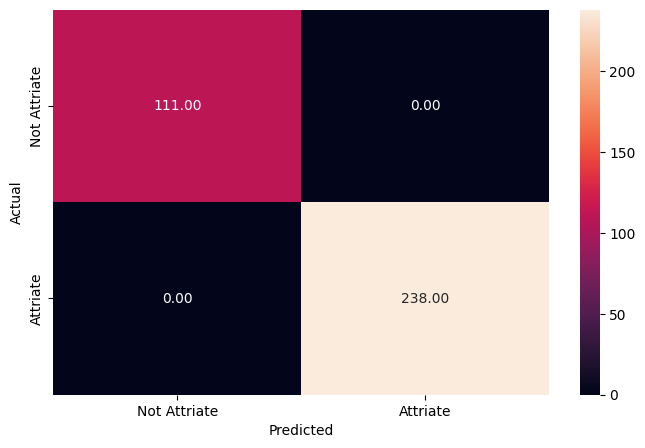

In [ ]:
y_train_pred_dt=dt.predict(X_train)
metrics_score(y_train,y_train_pred_dt)

**Observations**:
* Exceptional performance on the training data with perfect precision, recall, and F1-score for both classes (0 and 1).  
*   The model achieves 100% accuracy on the training set, indicating it has effectively memorized the training data.


**Checking the performance on the testing**

              precision    recall  f1-score   support

           0       0.53      0.66      0.58        47
           1       0.82      0.73      0.77       103

    accuracy                           0.71       150
   macro avg       0.67      0.69      0.68       150
weighted avg       0.73      0.71      0.71       150



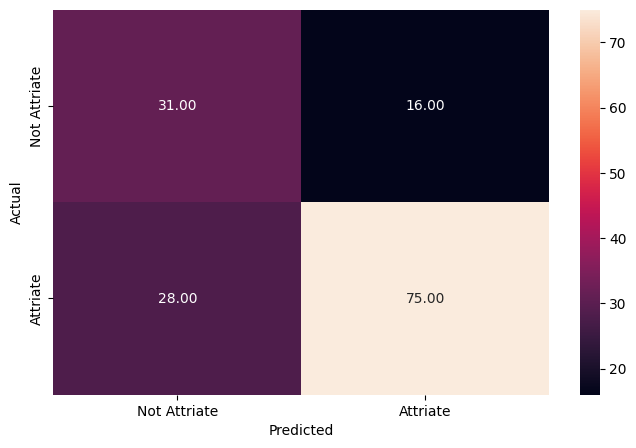

In [ ]:
y_pred_test_dt = dt.predict(X_test)
metrics_score(y_test, y_pred_test_dt)

Observations:

*In comparison to class 1 (0.82, 0.73, 0.77), precision, recall, and F1-score for class 0 (0.53, 0.66, 0.58) are comparatively lower.   
*The test set's overall accuracy is 0.71, which suggests a decline in performance when compared to the training set.
*Class 1 instances are classified by the model more accurately than class 0 instances.

Overall Observations:

* Perfect scores on the training set but a decline in performance on the test set suggest that the model may be overfitting the training data, where the model has memorized the training data instead of learning underlying patterns.
* The test set's lower metrics for class 0 indicate that the model might have trouble accurately classifying instances of this class.









**Examine the Feature Importance of the Variables**

<Axes: xlabel='Importance'>

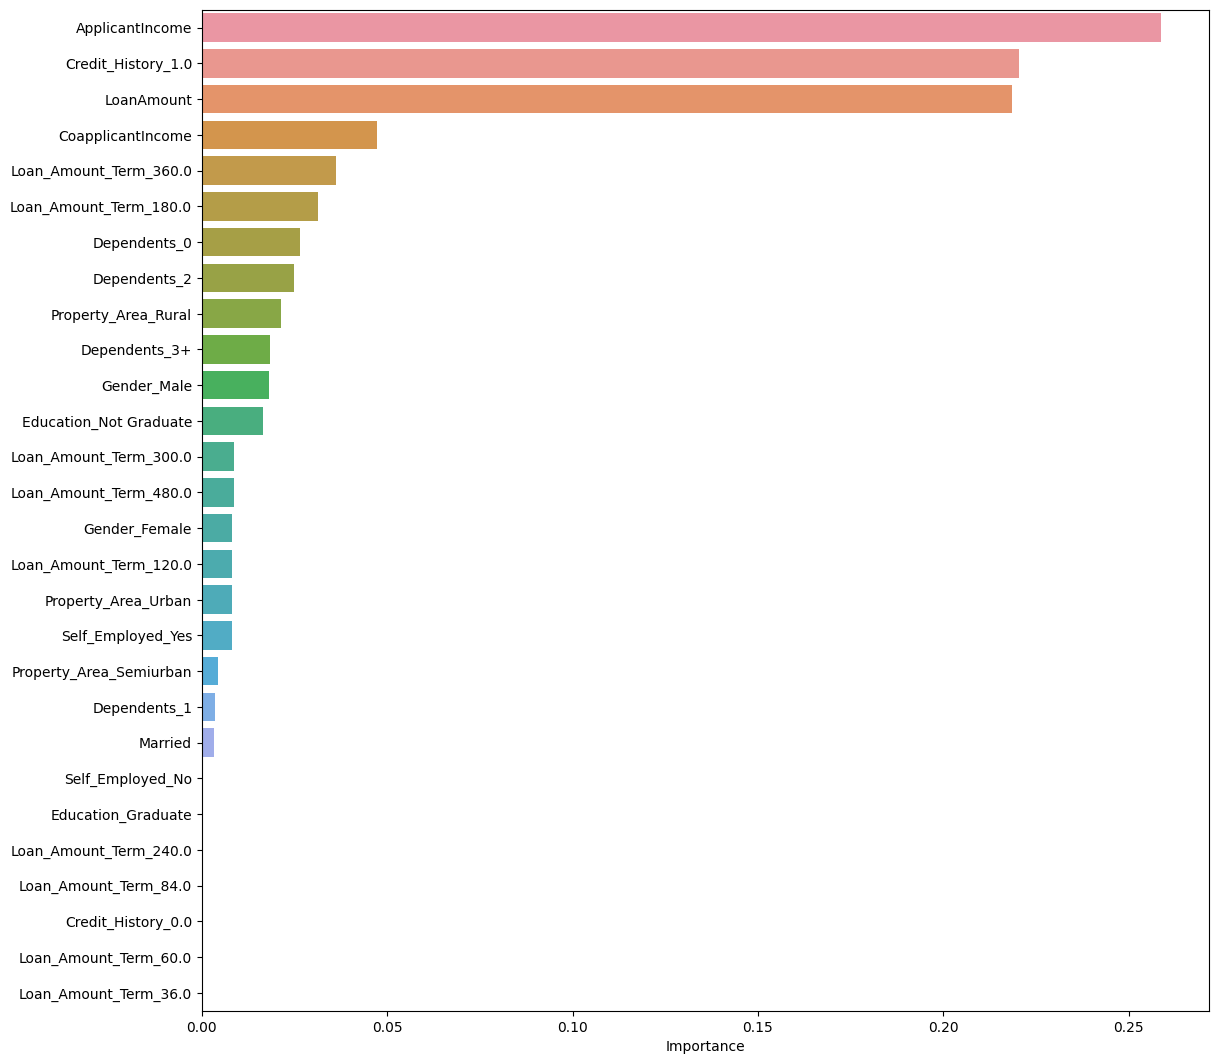

In [ ]:
importances = dt.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)


Observation: The plot provides insights into which features are most influential in the model's predictions.


*   Here, we can see that ApplicantIncome is the most influencing feature.
*   Followed by credit history and loanAmount.




**Method 2: Logistic Regression**

In [ ]:
#Logistic Regression Model Instantiate
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

**Model Performance**

              precision    recall  f1-score   support

           0       0.88      0.47      0.61       111
           1       0.80      0.97      0.88       238

    accuracy                           0.81       349
   macro avg       0.84      0.72      0.74       349
weighted avg       0.82      0.81      0.79       349



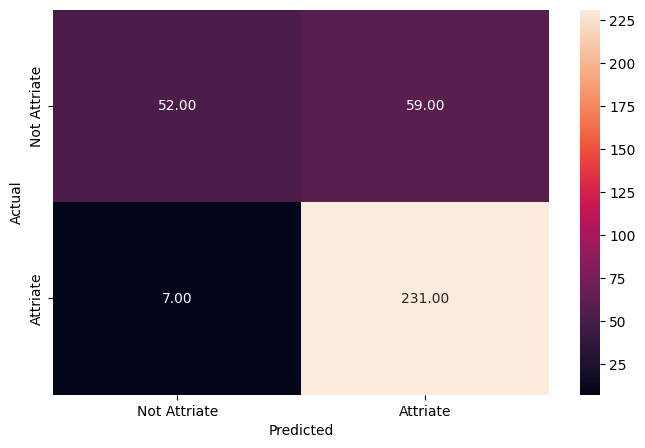

In [ ]:
#checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

Observations:
*   Accuracy (0.81): 81% of cases are correctly classified by the model.
*   The average F1-score for both classes is known as the macro average 0.74
*   The weighted average F1 score (0.79) takes into account the class imbalance.






              precision    recall  f1-score   support

           0       0.78      0.53      0.63        47
           1       0.81      0.93      0.87       103

    accuracy                           0.81       150
   macro avg       0.80      0.73      0.75       150
weighted avg       0.80      0.81      0.79       150



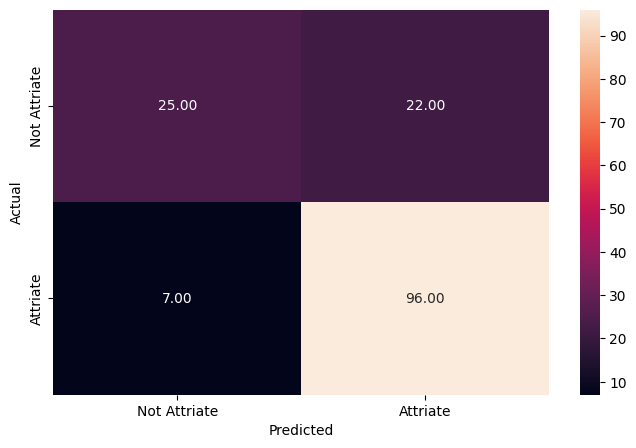

In [ ]:
#checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

Observations:

*  The model exhibits strong performance on the training set, attaining high recall, F1-scores, and precision for both classes.
* The model performs well on the test set in terms of precision and recall for class 1, but recall for class 0 is problematic.
* A thorough analysis is provided by taking into account both macro and weighted average F1-scores, particularly when taking class imbalances into account.








**Feature Importance**

In [ ]:
# Get absolute feature coefficients
coefficients = np.abs(lg.coef_[0])
feature_names = X.columns


In [ ]:
# Sort feature coefficients and corresponding feature names
indices = np.argsort(coefficients)[::-1]
sorted_coefficients = coefficients[indices]
sorted_coefficients_names = np.array(feature_names)[indices]

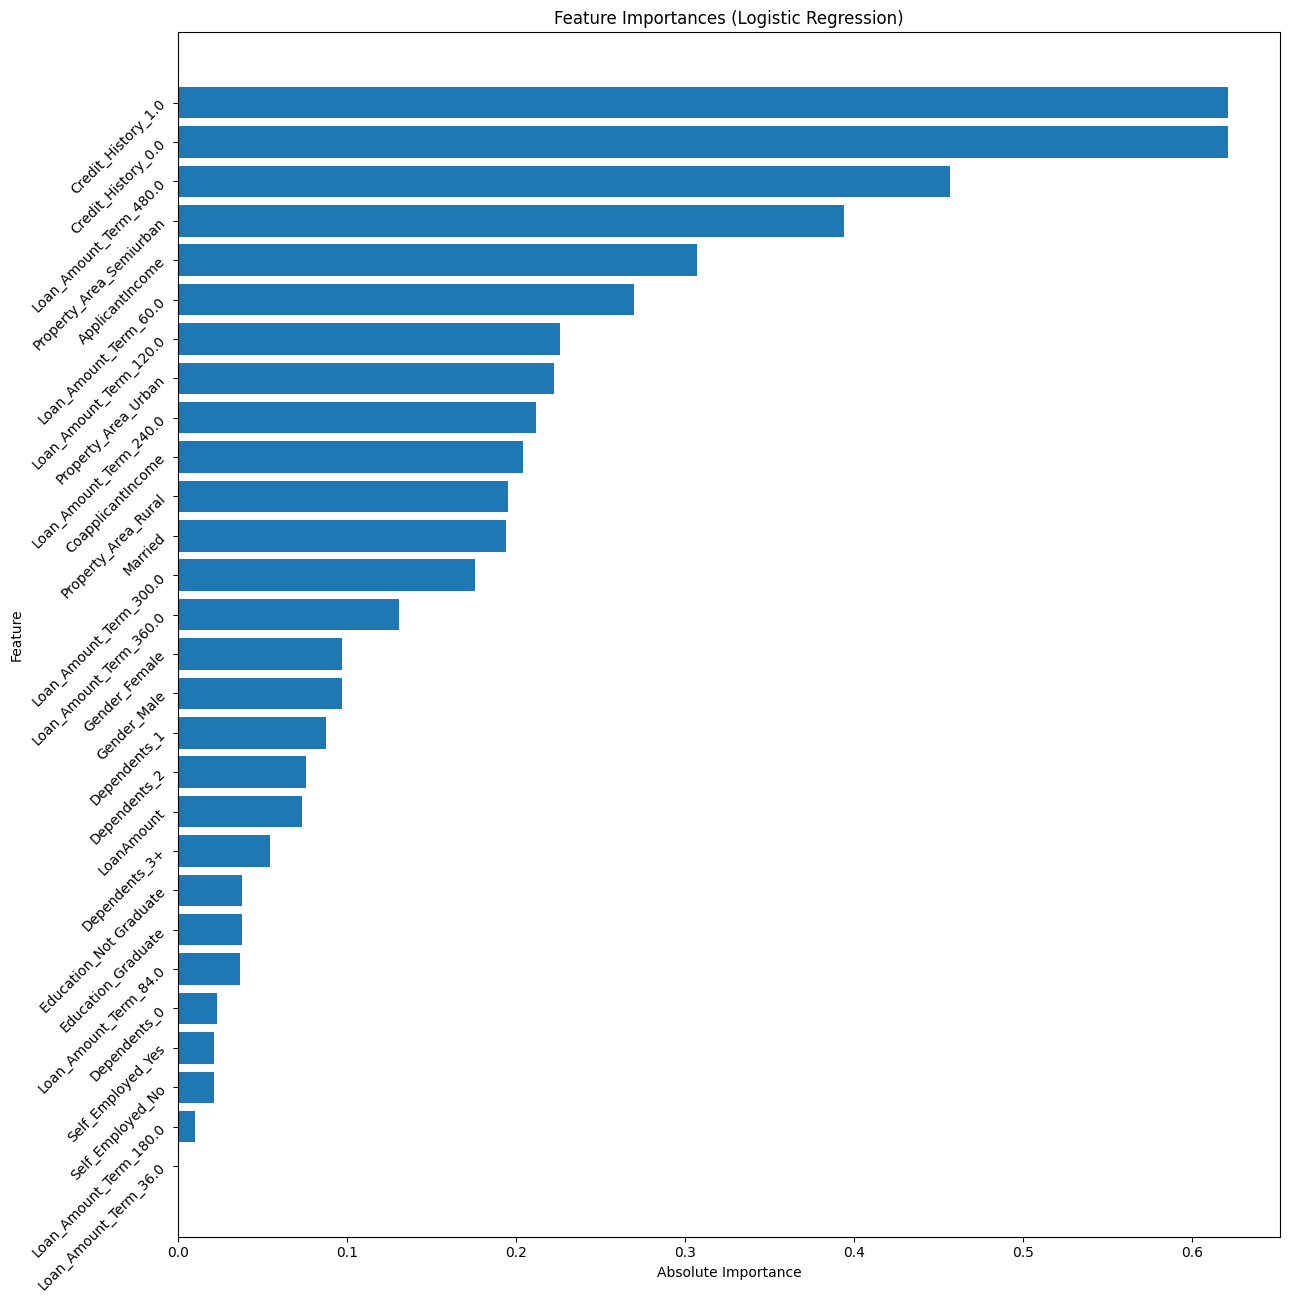

In [ ]:
# Convert sorted_feature_names to a list
sorted_coefficients_names = sorted_coefficients_names.tolist()

# Plotting
plt.figure(figsize=(13, 13))
plt.barh(range(X.shape[1]), sorted_coefficients, align="center")
plt.yticks(range(X.shape[1]), sorted_coefficients_names, rotation=45, ha="right")
plt.ylabel("Feature")
plt.xlabel("Absolute Importance")
plt.title("Feature Importances (Logistic Regression)")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Printing the coefficients of logistic regression
cols=X.columns
coef_lg=lg.coef_
pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)
y_scores_lg=lg.predict_proba(X_train)

#predict_proba gives the probability of each observation belonging to each class
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])



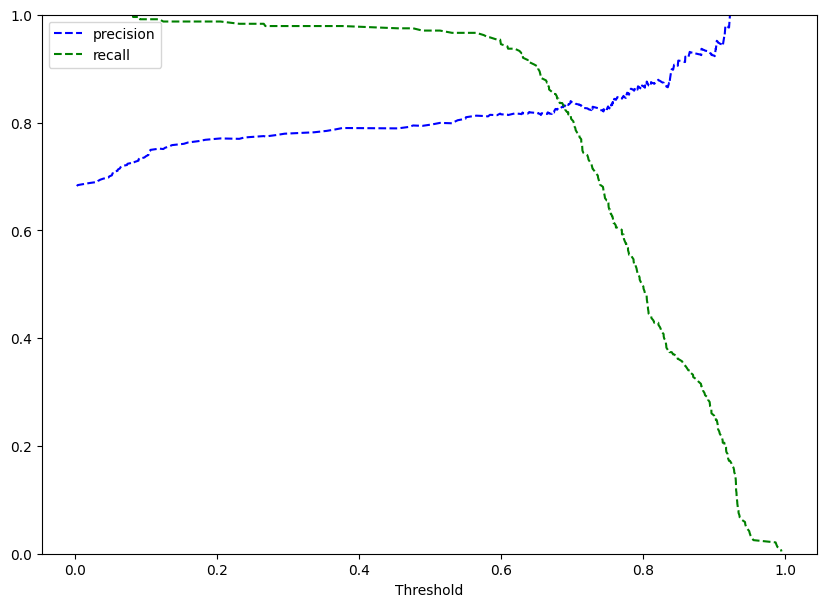

In [ ]:
#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()